In [1]:
library(ggplot2)
library(MOFA2)


Attaching package: ‘MOFA2’


The following object is masked from ‘package:stats’:

    predict




In [2]:
filepath = 'mofa_20220907-154443.hdf5'
model <- load_model(filepath)

Warning message in .quality_control(object, verbose = verbose):
“Factor(s) 1 are strongly correlated with the total number of expressed features for at least one of your omics. Such factors appear when there are differences in the total 'levels' between your samples, *sometimes* because of poor normalisation in the preprocessing steps.
”


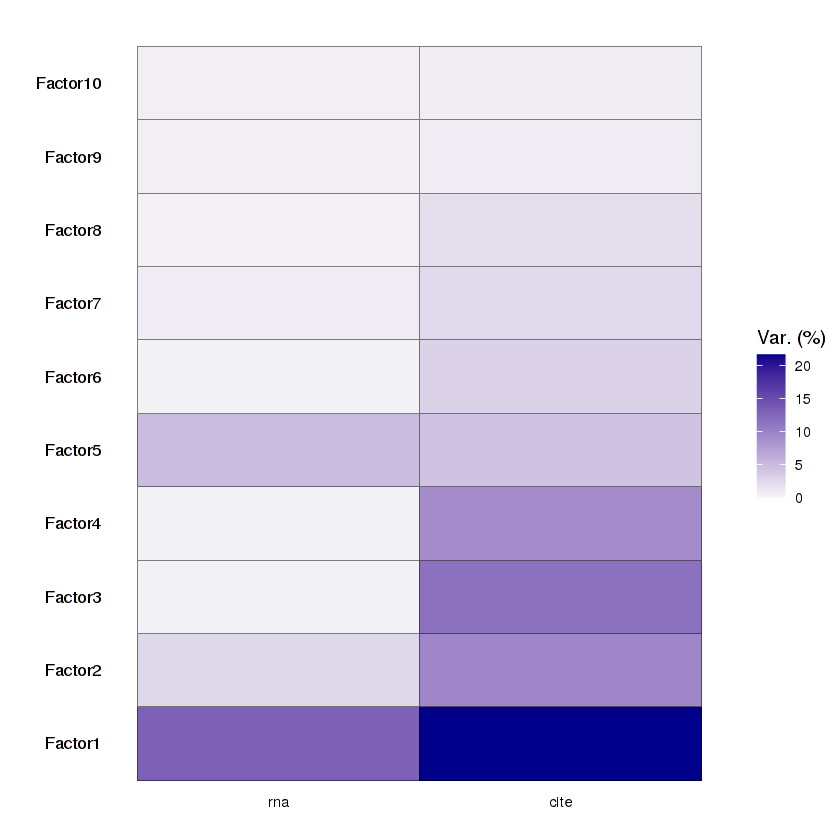

In [3]:
plot_variance_explained(model, x="view", y="factor")

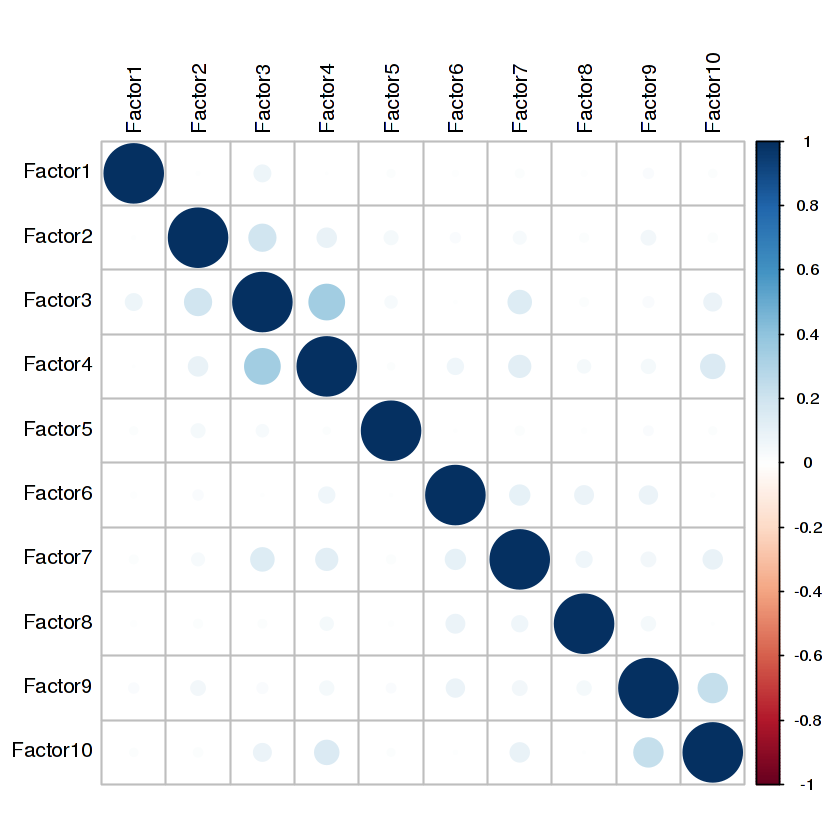

In [4]:
plot_factor_cor(model)

In [5]:
slotNames(model)

[1] "data"               "intercepts"         "imputed_data"      
 [4] "samples_metadata"   "features_metadata"  "expectations"      
 [7] "training_stats"     "training_options"   "stochastic_options"
[10] "data_options"       "model_options"      "dimensions"        
[13] "on_disk"            "dim_red"            "cache"             
[16] "status"

In [6]:
unique(model@samples_metadata$rna.adjustedcelltype)

[1] "Mono_NonClassical"         "B_Naive"                  
 [3] "Mono_Classical"            "NK_CD16hi"                
 [5] "B_CD27negIgDneg"           "gammadeltaT"              
 [7] "NK_CD56loCD16lo"           "PB_Plasmablasts"          
 [9] "CD4_CD45RAnegCD28pos"      "B_Mem.IgDneg"             
[11] "CD4_CD45RAnegCD28neg"      "CD8_CD45RAposCD28neg"     
[13] "CD8_CD45RAnegCD28pos"      "NK_CD56hiCD16lo"          
[15] "Mono_Intermediate"         "CD4_CD45RAposCD28pos"     
[17] "CD8_CD45RAposCD28pos"      "CD4_CD45RAposCD28neg"     
[19] "B_Mem.IgDpos"              "RBC"                      
[21] "CD8_CD45RAnegCD28neg"      "MAIT"                     
[23] "pDC"                       "Basophils"                
[25] "cDC"                       "Mono.NK"                  
[27] "Mono.T"                    "TissueResMemT"            
[29] "Platelets"                 "B_MemSort.IgMnegCD11cNeg" 
[31] "B_MemSort.IgMposCD11cneg"  "B_MemSort.IgMnegCD11cpos" 
[33] "B_MemSort.IgMpos.CD11cpos" "Unknown"                  
[35] "Dblt_Mono.T"               "RBC.Tcell"                
[37] "DNT"                       "Granulocytes"             
[39] "CD4.Platelet"              "Tcell"                    
[41] "B.Granulocyte"             "dim"                      
[43] "TCRVbeta13.1pos"           "Dblt_T:Granulocytes"

In [7]:
# model@samples_metadata$celltypetest <- model@samples_metadata$rna.adjustedcelltype
for (i in unique(model@samples_metadata$rna.adjustedcelltype)){
    model@samples_metadata[,i] <- ifelse(model@samples_metadata$rna.adjustedcelltype == i, 1, 0)
}

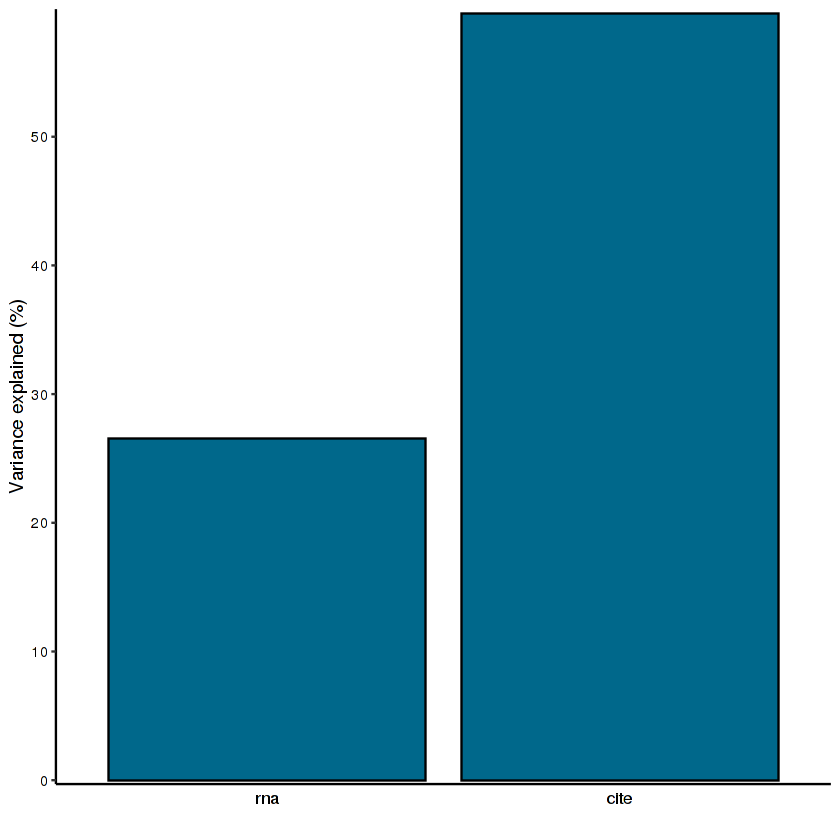

In [8]:
plot_variance_explained(model, plot_total = T)[[2]]

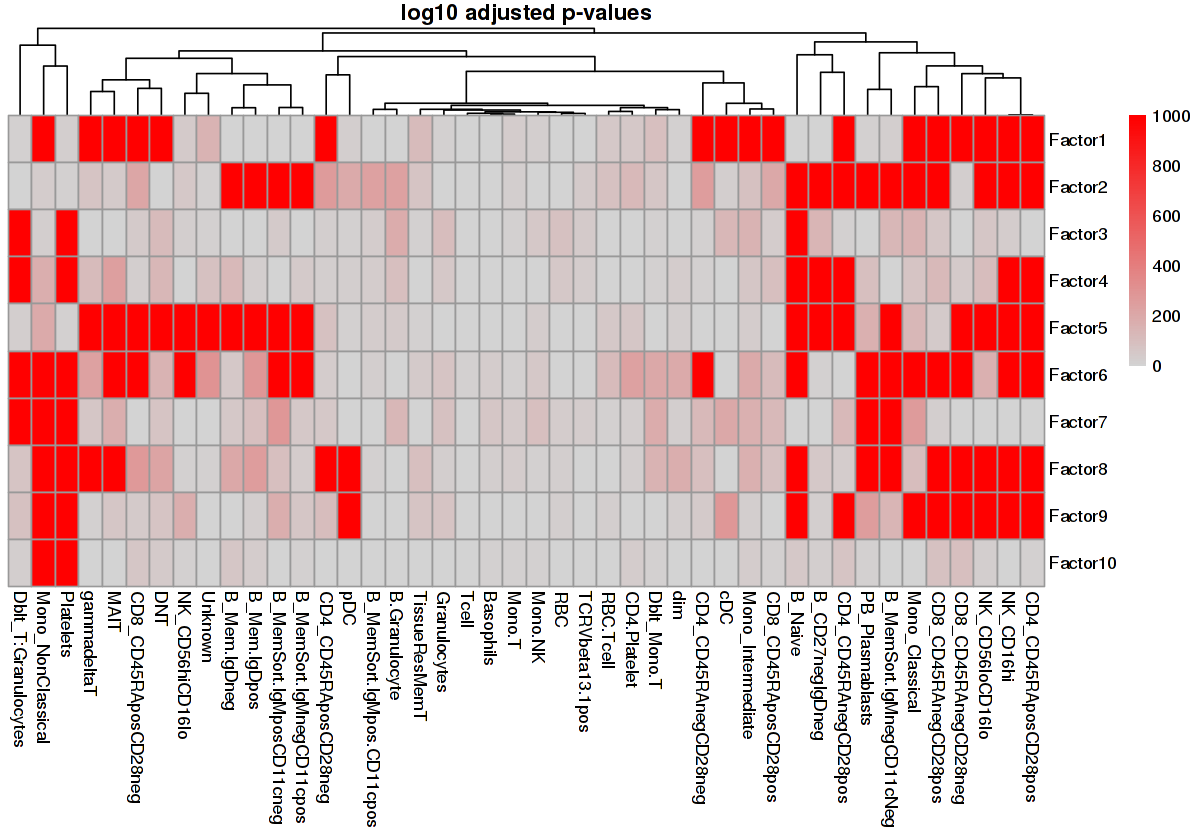

In [9]:
options(repr.plot.width = 10, repr.plot.height = 7)
correlate_factors_with_covariates(model, 
  covariates = unique(model@samples_metadata$rna.adjustedcelltype), 
  plot="log_pval"
)

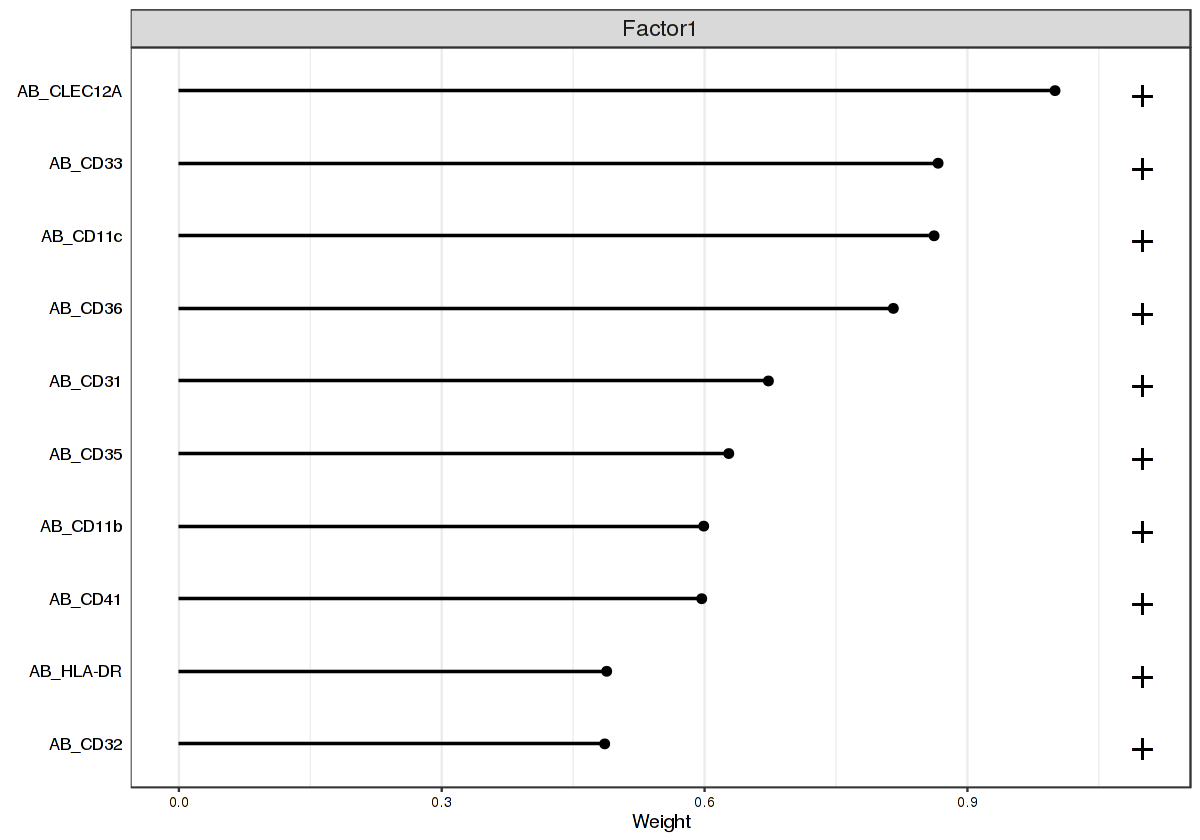

In [10]:
plot_top_weights(model,
 view = "cite",
 factor = 1,
 nfeatures = 10,     # Top number of features to highlight
 scale = T           # Scale weights from -1 to 1
)

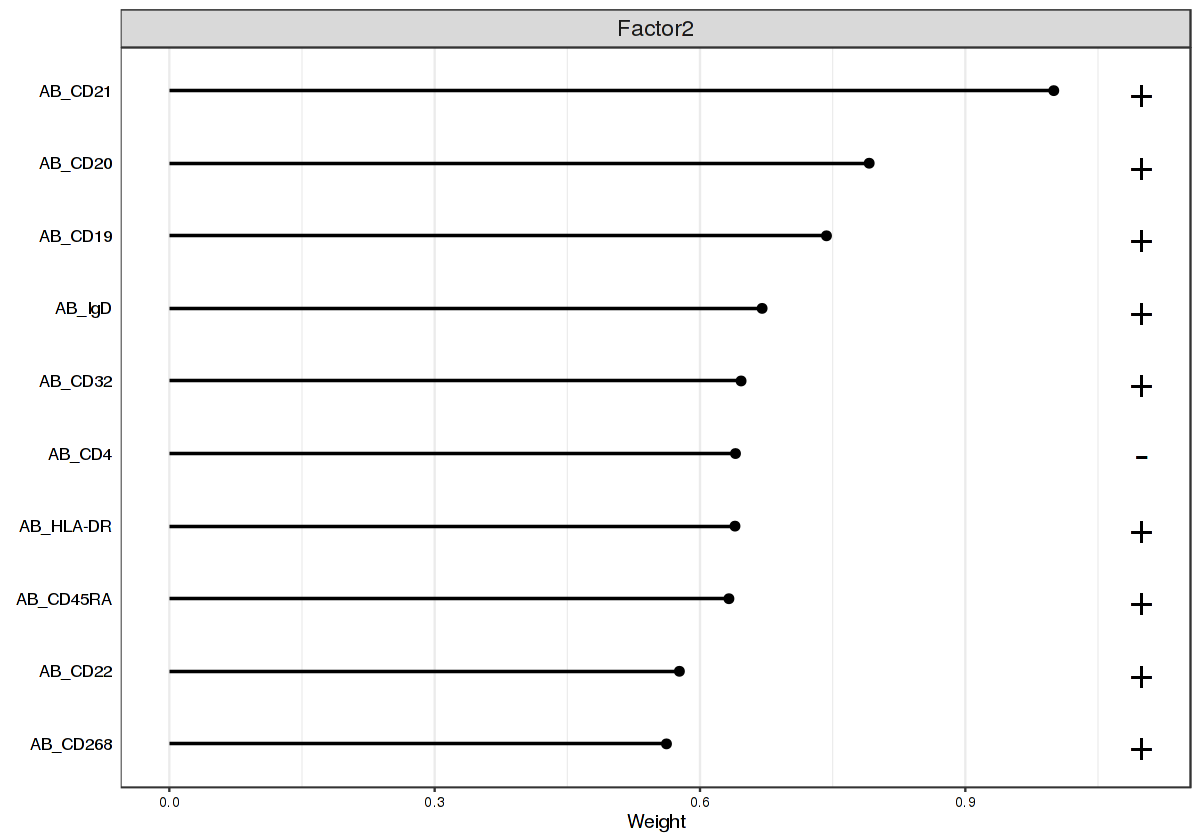

In [11]:
plot_top_weights(model,
 view = "cite",
 factor = 2,
 nfeatures = 10,     # Top number of features to highlight
 scale = T           # Scale weights from -1 to 1
)

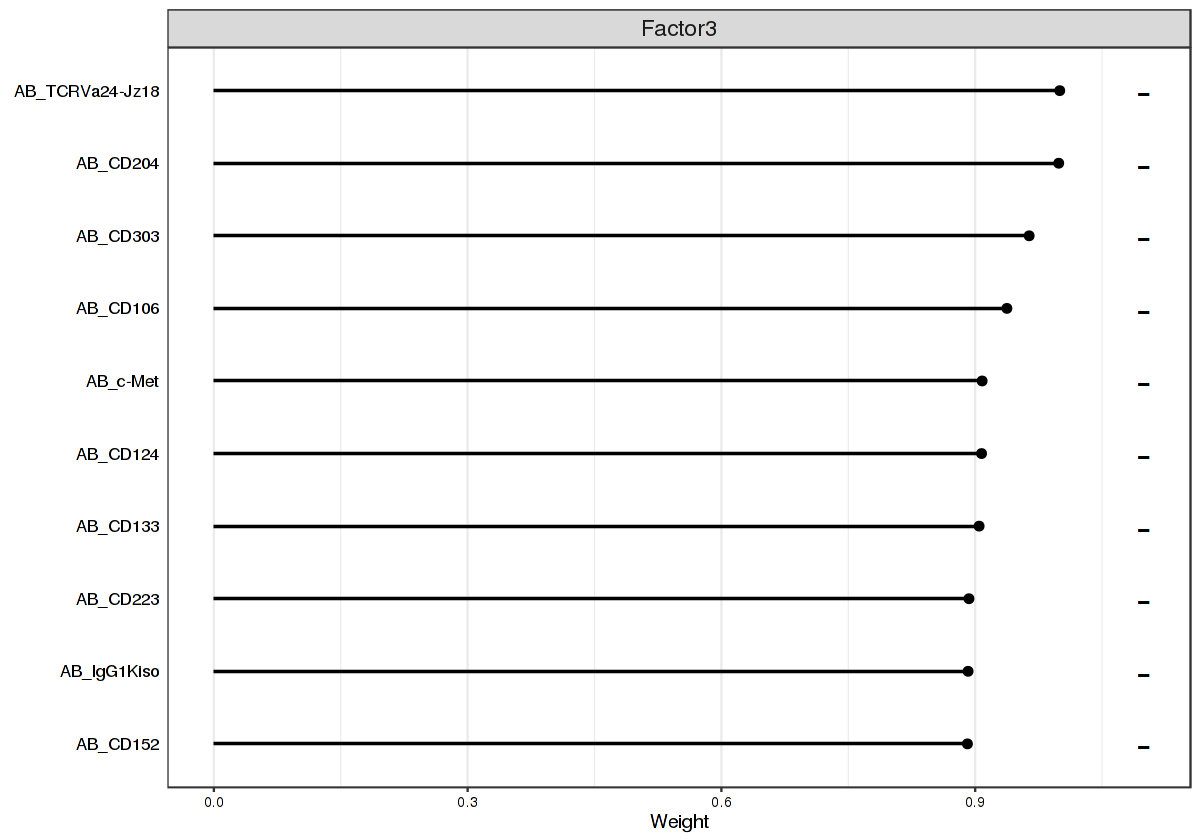

In [12]:
plot_top_weights(model,
 view = "cite",
 factor = 3,
 nfeatures = 10,     # Top number of features to highlight
 scale = T           # Scale weights from -1 to 1
)